In [1]:
 # The merger rate of the PBH binaries without DM halos assuming that t_merge holds for vaccum only.
# m_j = m_2
# m_i = m_1  and m_2 < equal to m_1.
# Merger Method 1 = Merger of PBH binaries with evaporated DM spikes.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
import mass_function
import matplotlib.ticker as tkr
from matplotlib.ticker import LogFormatter 
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


PBH_mass_function = np.loadtxt("PBH_mass_function.txt")




π = np.pi
Ω_cdm = 0.85
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1808e3           #in units of M☉ pc^-3 with ρ_eq=2.1548e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.5923e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3





# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.
    
    
    
def merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence):
    
    if  m_1 < m_min: 
        return 0
    
    elif m_2 < m_min:
        return 0
    
    else:
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    
        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(4 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
        
        X = np.geomspace(X_min, X_max, 100000) 

    
        if DM_halos_presence == 'False':
        
        # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .
        
        
            k_nohalo = 19.6157
            A_nohalo = ((ρ_eq**(4/3))*(G**3)*(k_nohalo**7))/(c**5)

            
            def B(m_1,m_2,Δ_1,Δ_2):
                return (A_nohalo**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))

            
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
        
            
            def integrand(m_1,m_2,Δ_1,Δ_2, X):
                return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
    

            return (1/(7 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand(m_1,m_2,Δ_1,Δ_2, X),X)) 
     
        
        else:

            # Merger rate of  PBH binaries with halos for PBHs mass range of 5 M☉-100 M☉ .
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03062*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return np.sqrt(2) * (np.sqrt(3/(8*π*G*ρ_eq))) * (((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3))


            def ρ_bar(m):
                return (1/2) * (ρ_eq * Ω_cdm) * (t_eq**(3/2)) * ((2*G*m)**(3/4))
            
            #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
            def r_ta(m): 
                return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return ((16*π)/3) * ρ_bar(m)* ((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4))


            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))

        

            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


            #Schwarzchild Radius of the PBH.
            def r_s(m): 
                return ((2*G*m)/(c**2)) 


            #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
            def r_ta(m): 
                return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


            # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
            def E_b(m): 
                return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



            def a_initial(m_1, m_2, Δ_1, Δ_2, X):
                return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0068 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

            
            def beta(m_1,m_2,Δ_1, Δ_2, X):
                return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))


            k_halo = 19.5777
            A_halo = ((ρ_eq**(4/3))*(G**3)*(k_halo**7))/(c**5)

            
            def B(m_1,m_2,Δ_1,Δ_2):
                return (A_halo**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.5192 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 

            
        
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
                return (((1 + 0.0861 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0696 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21))  * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))
        
        
        
            def integrand(m_1,m_2,Δ_1,Δ_2, X):
                return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))
    

            return (1/(7 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand(m_1,m_2,Δ_1,Δ_2, X),X)) 
     

In [3]:
bin_centres = np.geomspace(6, 96, 35)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(6, 96, 35)
m_2 = np.geomspace(6, 96, 35)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = [np.ceil(m_1) for m_1 in m_1_list]
m_2_list = [np.ceil(m_2) for m_2 in m_2_list]
    

    
Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)



m_min = 5     #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-5
X_max = 1e5

f = np.geomspace(1e-5, 1, 45)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()


m_1 = [6.0, 7.0, 8.0, 8.0, 9.0, 10.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 19.0, 21.0, 23.0, 24.0, 27.0, 29.0, 31.0, 34.0, 37.0, 40.0, 43.0, 47.0, 50.0, 55.0, 59.0, 64.0, 70.0, 76.0, 82.0, 89.0, 96.0] M☉

Δ_1 = [0.48941594, 0.53099864, 0.57611436, 0.62506329, 0.67817111, 0.73579118, 0.79830688, 0.86613416, 0.93972431, 1.01956696, 1.10619336, 1.20017988, 1.30215186, 1.41278778, 1.53282376, 1.66305846, 1.80435842, 1.95766377, 2.12399455, 2.30445744, 2.50025316, 2.71268445, 2.94316474, 3.19322753, 3.46453664, 3.75889723, 4.07826785, 4.42477345, 4.80071952, 5.20860744, 5.65115111, 6.13129503, 6.65223385, 7.21743367, 7.83065508]


In [4]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

m_1 = m_1_list[0]
Δ_1 = Δ_1_list[0]
m_2 = m_1_list[0]
Δ_2 = Δ_2_list[0]




merge_Lognormal_nohalo = np.zeros(len(f_pbh_list))


for z, f_pbh in enumerate(f_pbh_list):
            DM_halos_presence = 'False'
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if m_1 == m_2:
                merge_Lognormal_nohalo[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_Lognormal_nohalo[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            
            
            

merge_Lognormal_halo_method_1 = np.zeros(len(f_pbh_list))


for z, f_pbh in enumerate(f_pbh_list):
            DM_halos_presence = 'True'
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if m_1 == m_2:
                merge_Lognormal_halo_method_1[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_Lognormal_halo_method_1[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            

In [5]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

m_1 = m_1_list[-1]
Δ_1 = Δ_1_list[-1]
m_2 = m_1_list[-1]
Δ_2 = Δ_2_list[-1]




merge_Lognormal_nohalo1 = np.zeros(len(f_pbh_list))


for z, f_pbh in enumerate(f_pbh_list):
            DM_halos_presence = 'False'
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if m_1 == m_2:
                merge_Lognormal_nohalo1[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_Lognormal_nohalo1[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            
            
            

merge_Lognormal_halo1_method_1 = np.zeros(len(f_pbh_list))


for z, f_pbh in enumerate(f_pbh_list):
            DM_halos_presence = 'True'
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if m_1 == m_2:
                merge_Lognormal_halo1_method_1[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_Lognormal_halo1_method_1[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            

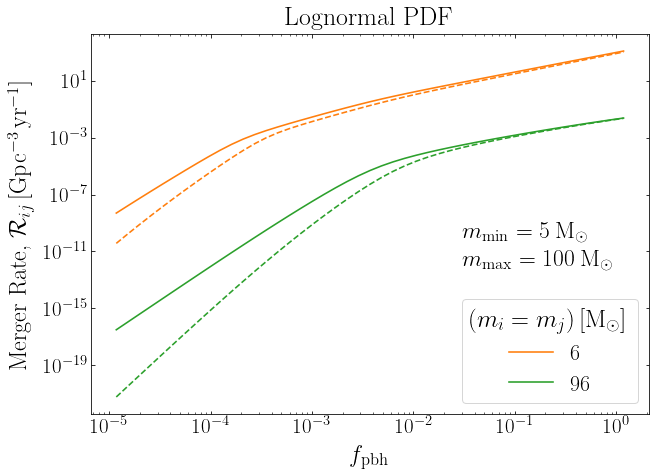

In [6]:
plt.figure(figsize = (10, 7))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which = 'both', right = True, top = True)

#plt.text(3e-2, 1e-1, "Lognormal PDF", size = 23.5)
plt.text(3e-2, 1e-10, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 23.5)
plt.text(3e-2, 1e-12,  "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 23.5)




plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)

plt.loglog(f_pbh_list, merge_Lognormal_halo_method_1, 'C1')
plt.loglog(f_pbh_list, merge_Lognormal_halo1_method_1, 'C2')
plt.loglog(f_pbh_list, merge_Lognormal_nohalo, 'C1', linestyle = '--')
plt.loglog(f_pbh_list, merge_Lognormal_nohalo1, 'C2', linestyle = '--')

#plt.xlim(1e-5, 1)
#plt.ylim(1.9e-5, 1e6)



#plt.axhline(y = 17.9, color = '#6E705E')
#plt.axhline(y = 44, color = '#6E705E')
#plt.axhspan(17.9, 44, 1e-5, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 24, labelpad = 9)
plt.ylabel('Merger Rate, $ \mathcal{R}_{ij} \,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 24, labelpad = 9)
plt.legend(["$ 6 $", "$ 96 $"], prop = {'size':22}, loc = 'lower right', 
           title = '$(m_{i} = m_{j}) \,[\mathrm{M_{\odot}}]$', title_fontsize = 25,  facecolor = 'white', fontsize = 110)
plt.title('Lognormal PDF', fontsize = 26, pad = 9)
plt.savefig('Lgnmlmergervsf.pdf', bbox_inches = 'tight')
plt.show()

In [7]:
bin_centres = np.geomspace(2e-2, 88, 35)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-2, 88, 35)
m_2 = np.geomspace(2e-2, 88, 35)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 

 

Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_min = 1e-2  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-5
X_max = 1e5


f = np.geomspace(1e-5, 1, 45)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()


m_1 = [0.02, 0.03, 0.03, 0.04, 0.05, 0.07, 0.09, 0.11, 0.14, 0.18, 0.24, 0.3, 0.39, 0.49, 0.63, 0.81, 1.04, 1.33, 1.7, 2.17, 2.78, 3.56, 4.56, 5.83, 7.46, 9.55, 12.22, 15.64, 20.02, 25.63, 32.8, 41.98, 53.72, 68.76, 88.0] M☉

Δ_1 = [0.00494745, 0.00633201, 0.00810404, 0.01037199, 0.01327463, 0.01698959, 0.02174419, 0.02782939, 0.03561755, 0.04558526, 0.05834247, 0.07466983, 0.09556647, 0.12231111, 0.15654034, 0.20034876, 0.25641713, 0.32817644, 0.42001788, 0.53756149, 0.68800013, 0.88053961, 1.12696199, 1.44234662, 1.84599285, 2.36260102, 3.02378397, 3.87000149, 4.95303624, 6.33916241, 8.11320129, 10.38371176, 13.28963328, 17.00878806, 21.76876257]


In [8]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

m_1 = m_1_list[0]
Δ_1 = Δ_1_list[0]
m_2 = m_1_list[0]
Δ_2 = Δ_2_list[0]


merge_PWR_nohalo = np.zeros(len(f_pbh_list))
for z, f_pbh in enumerate(f_pbh_list):
            
            DM_halos_presence = 'False'
            f =  f_pbh*0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 1e-2     #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if m_1 == m_2:
                merge_PWR_nohalo[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_PWR_nohalo[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            

            
            
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

merge_PWR_halo_method_1 = np.zeros(len(f_pbh_list))
for z, f_pbh in enumerate(f_pbh_list):
            DM_halos_presence = 'True'   
            f =  f_pbh*0.85
           
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 1e-2     #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if m_1 == m_2:
                merge_PWR_halo_method_1[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_PWR_halo_method_1[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)             

In [9]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

m_1 = m_1_list[-1]
Δ_1 = Δ_1_list[-1]
m_2 = m_1_list[-1]
Δ_2 = Δ_2_list[-1]


merge_PWR_nohalo1 = np.zeros(len(f_pbh_list))
for z, f_pbh in enumerate(f_pbh_list):
            
            DM_halos_presence = 'False'
            f =  f_pbh*0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 1e-2     #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if m_1 == m_2:
                merge_PWR_nohalo1[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_PWR_nohalo1[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            

            
            
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

merge_PWR_halo1_method_1 = np.zeros(len(f_pbh_list))
for z, f_pbh in enumerate(f_pbh_list):
            DM_halos_presence = 'True'   
            f =  f_pbh*0.85
           
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 1e-2     #in units of M☉, for PBHs mass range of m_min = 1e-2 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if m_1 == m_2:
                merge_PWR_halo1_method_1[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_PWR_halo1_method_1[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)             

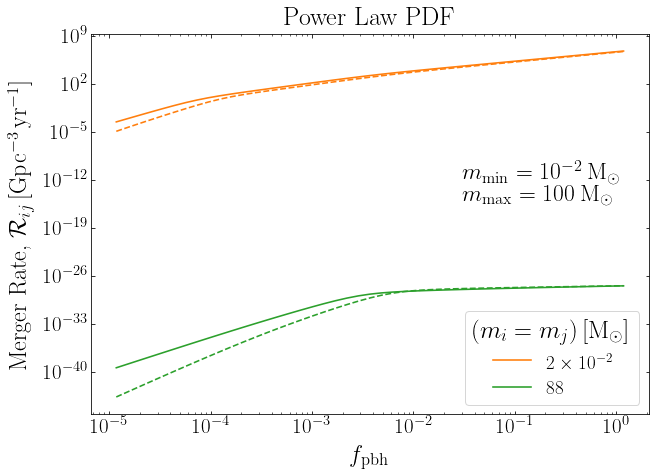

In [12]:
plt.figure(figsize = (10, 7))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which = 'both', right = True, top = True)

#plt.text(3e-2, 1e-1, "Lognormal PDF", size = 23.5)
plt.text(3e-2, 1e-12, "$m_\mathrm{{min}} = 10^{-2} \: \mathrm{M_{\odot}}$", size = 23.5)
plt.text(3e-2, 1e-15,  "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 23.5)




plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)

plt.loglog(f_pbh_list, merge_PWR_halo_method_1, 'C1')
plt.loglog(f_pbh_list, merge_PWR_halo1_method_1, 'C2')
plt.loglog(f_pbh_list, merge_PWR_nohalo, 'C1', linestyle = '--')
plt.loglog(f_pbh_list, merge_PWR_nohalo1, 'C2', linestyle = '--')

#plt.xlim(1e-5, 1)
#plt.ylim(1.9e-5, 1e6)
#plt.axhline(y = 17.9, color = '#6E705E')
#plt.axhline(y = 44, color = '#6E705E')
#plt.axhspan(17.9, 44, 1e-5, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 24, labelpad = 9)
plt.ylabel('Merger Rate, $ \mathcal{R}_{ij} \,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 24, labelpad = 9)
plt.legend([r"$ 2\times 10^{-2} $", "$ 88 $"], prop = {'size':19}, loc = 'lower right', 
           title = '$(m_{i} = m_{j}) \,[\mathrm{M_{\odot}}]$', title_fontsize = 25,  facecolor = 'white', fontsize = 110)
plt.title('Power Law PDF', fontsize = 26, pad = 9)
plt.savefig('Pwrmergervsf.pdf', bbox_inches = 'tight')
plt.show()

In [13]:
bin_centres = np.geomspace(2e-4, 83, 35)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(2e-4, 83, 35)
m_2 = np.geomspace(2e-4, 83, 35)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   



m_1_list = list(map(lambda x: float(format(x, '.4f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.4f')), m_2_list)) 




Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_min = 1e-4
m_max = 100

X_min = 1e-5
X_max = 1e5

f = np.geomspace(1e-5, 1, 45)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()


m_1 = [0.0002, 0.0003, 0.0004, 0.0006, 0.0009, 0.0013, 0.002, 0.0029, 0.0042, 0.0061, 0.009, 0.0131, 0.0192, 0.0281, 0.0411, 0.0602, 0.0881, 0.1288, 0.1885, 0.2758, 0.4034, 0.5902, 0.8635, 1.2632, 1.848, 2.7036, 3.9553, 5.7866, 8.4656, 12.385, 18.1189, 26.5075, 38.7797, 56.7337, 83.0] M☉

Δ_1 = [7.655e-05, 0.000112, 0.00016385, 0.00023971, 0.00035068, 0.00051304, 0.00075057, 0.00109806, 0.00160643, 0.00235017, 0.00343824, 0.00503005, 0.00735884, 0.01076579, 0.01575007, 0.02304195, 0.03370978, 0.04931654, 0.07214883, 0.10555189, 0.15441971, 0.22591208, 0.33050357, 0.48351824, 0.70737478, 1.03487115, 1.51398994, 2.21492843, 3.24038346, 4.74059785, 6.93537301, 10.14627275, 14.84373668, 21.71600586, 31.76995933]


In [14]:
m_1 = m_1_list[0]
Δ_1 = Δ_1_list[0]
m_2 = m_1_list[0]
Δ_2 = Δ_2_list[0]


merge_multipeak_PDF_nohalo = np.zeros(len(f_pbh_list))
for z, f_pbh in enumerate(f_pbh_list):
            DM_halos_presence = 'False'
            f =  f_pbh*0.85
            
            def P(m):    #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ 
                return mass_function.new_PDF(m)

            if m_1 == m_2:
                merge_multipeak_PDF_nohalo[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_multipeak_PDF_nohalo[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            
            
            
merge_multipeak_PDF_halo_method_1 = np.zeros(len(f_pbh_list))
for z, f_pbh in enumerate(f_pbh_list):
            DM_halos_presence = 'True'
            f =  f_pbh*0.85
            
            def P(m):    #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ 
                return mass_function.new_PDF(m)

            if m_1 == m_2:
                merge_multipeak_PDF_halo_method_1[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_multipeak_PDF_halo_method_1[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            

/tmp/ipykernel_146112/1687942201.py:80: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of


In [15]:
m_1 = m_1_list[-1]
Δ_1 = Δ_1_list[-1]
m_2 = m_1_list[-1]
Δ_2 = Δ_2_list[-1]


merge_multipeak_PDF_nohalo1 = np.zeros(len(f_pbh_list))
for z, f_pbh in enumerate(f_pbh_list):
            DM_halos_presence = 'False'
            f =  f_pbh*0.85
            
            def P(m):    #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ 
                return mass_function.new_PDF(m)

            if m_1 == m_2:
                merge_multipeak_PDF_nohalo1[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_multipeak_PDF_nohalo1[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            
            
            
            
merge_multipeak_PDF_halo1_method_1 = np.zeros(len(f_pbh_list))
for z, f_pbh in enumerate(f_pbh_list):
            DM_halos_presence = 'True'
            f =  f_pbh*0.85
            
            def P(m):    #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ 
                return mass_function.new_PDF(m)

            if m_1 == m_2:
                merge_multipeak_PDF_halo1_method_1[z] = 0.5 * merger_method_1(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)
            
            else:
                merge_multipeak_PDF_halo1_method_1[z] = merger_method_1( m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence)   
            

/tmp/ipykernel_146112/1687942201.py:80: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of


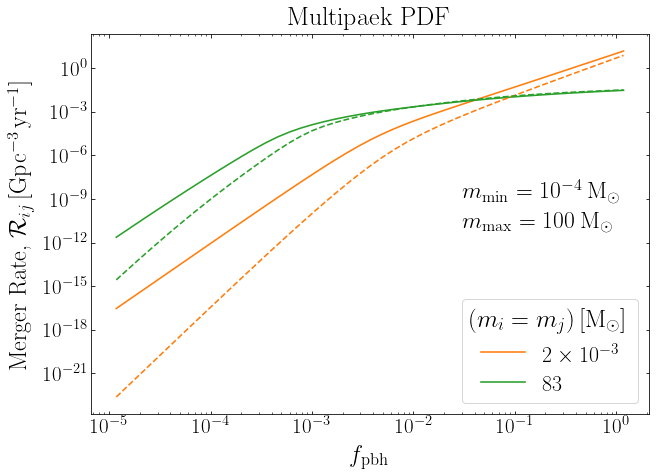

In [16]:
plt.figure(figsize = (10, 7))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which = 'both', right = True, top = True)

#plt.text(3e-2, 1e-1, "Lognormal PDF", size = 23.5)
plt.text(3e-2, 1e-9, "$m_\mathrm{{min}} = 10^{-4} \: \mathrm{M_{\odot}}$", size = 23.5)
plt.text(3e-2, 1e-11,  "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 23.5)




plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)

plt.loglog(f_pbh_list, merge_multipeak_PDF_halo_method_1, 'C1')
plt.loglog(f_pbh_list, merge_multipeak_PDF_halo1_method_1, 'C2')
plt.loglog(f_pbh_list, merge_multipeak_PDF_nohalo, 'C1', linestyle = '--')
plt.loglog(f_pbh_list, merge_multipeak_PDF_nohalo1, 'C2', linestyle = '--')

#plt.xlim(1e-5, 1)
#plt.ylim(1.9e-5, 1e6)



#plt.axhline(y = 17.9, color = '#6E705E')
#plt.axhline(y = 44, color = '#6E705E')
#plt.axhspan(17.9, 44, 1e-5, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 24, labelpad = 9)
plt.ylabel('Merger Rate, $ \mathcal{R}_{ij} \,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 24, labelpad = 9)
plt.legend([r"$ 2\times 10^{-3} $", "$ 83 $"], prop = {'size':22}, loc = 'lower right', 
           title = '$(m_{i} = m_{j}) \,[\mathrm{M_{\odot}}]$', title_fontsize = 25,  facecolor = 'white', fontsize = 110)
plt.title('Multipaek PDF', fontsize = 26, pad = 9)
plt.savefig('newPDFmergervsf.pdf', bbox_inches = 'tight')
plt.show()